# MNIST One Hot Encoding  MSE Test

In [1]:
import numpy

In [2]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

### Modify the model.
To use MSE, we need to do the following
* use no activataion function on the output layer (no `softmax`)
* y values need to be converted to one-hot encoded
* `argmax` needs to be used to ultimately convert back to categories

In [3]:
mse_model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(64, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [4]:
mse_model.compile(optimizer='adam',
              loss='mse')

#### Convert output to one-hot

In [5]:
y_train_oh = tf.keras.utils.to_categorical(y_train)
y_test_oh = tf.keras.utils.to_categorical(y_test)

In [6]:
mse_model.fit(x_train, y_train_oh,  epochs=20,validation_data=(x_test, y_test_oh), verbose=0)

## We display some results
### The validation loss tells us how well the training went

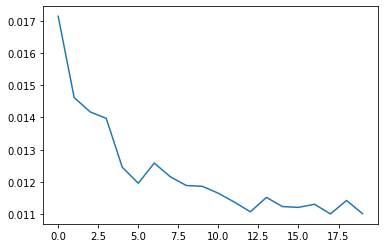

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display, Markdown

plt.plot(mse_model.history.history['val_loss'])

## Define accuracy: Use argmax to convert to category

In [8]:
def accuracy(model, x, y):
    y_pred=tf.argmax(model.predict(x),axis=1)
    right=numpy.count_nonzero(y_pred==y)

    return right/len(y)

### Print the final results in big bold text

In [9]:
text = "The accuracy is {:4.3f}% for the test set and {:4.3f}% for the training set".format(
    accuracy(mse_model, x_test,y_test)*100,
    accuracy(mse_model, x_train,y_train)*100)
display(Markdown(f"# {text}"))

# The accuracy is 96.340% for the test set and 97.247% for the training set

In [10]:
text

'The accuracy is 96.340% for the test set and 97.247% for the training set'